In [76]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *

In [77]:
import fastai
from fastai.version import __version__
print(__version__)

1.0.61


In [78]:
from fastai.vision import *

In [79]:
from fastai.tabular import *

In [80]:

df = pd.read_csv('../input/carpriceprediction/CarPrice_Assignment.csv')
dep_var = 'price'
cat_names = ['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
cont_names = ['car_ID','symboling','wheelbase','carlength','carwidth','carheight', 'curbweight','enginesize','boreratio','stroke', 'compressionratio',
              'horsepower','peakrpm','citympg','highwaympg']
procs = [Categorify, Normalize]

In [81]:
test = TabularList.from_df(df.iloc[180:205].copy(), cat_names=cat_names, cont_names=cont_names)

In [82]:
df.shape

(205, 26)

In [83]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [85]:
# Train data bunch
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.1, seed = 42)
                        .label_from_df(cols = dep_var, label_cls = FloatList, log = True )
                        .add_test(test)
                        .databunch())

In [86]:
#Display the data batch
data.show_batch(rows = 5)

CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,target
mitsubishi mirage,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,-0.4203,0.9079,-0.8403,-1.3648,-0.7149,-1.1634,-1.2368,-0.8543,-1.3092,-0.0794,-0.1797,-0.9224,0.7375,1.8661,1.5697,8.592115
mazda glc custom,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,-0.6721,0.1119,0.0173,0.3086,0.2749,0.0009,-0.3311,-0.1110,0.2333,0.4283,-0.3878,-0.5172,-0.7063,0.1337,0.2078,9.268138
bmw 320i,gas,std,four,sedan,rwd,front,ohc,four,mpfi,-1.5115,-0.6842,0.4208,0.2270,-0.5264,0.2418,-0.3117,-0.4579,0.6372,-1.4438,-0.3358,-0.0867,1.3562,-0.3388,-0.2462,9.736547
plymouth satellite custom (sw),gas,std,four,sedan,fwd,front,ohc,four,2bbl,0.3351,0.1119,-0.8403,-0.5485,-0.9977,-1.1634,-1.0991,-0.9038,-1.3092,-0.0794,-0.1797,-0.9224,0.7375,0.9211,1.1157,8.808668
peugeot 504,gas,std,four,sedan,rwd,front,l,four,mpfi,0.1001,-0.6842,1.5475,1.0351,1.1704,1.2053,0.9004,-0.1606,0.4903,-0.2063,-0.4398,-0.1880,-0.2938,-0.9688,-1.0028,9.384294


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,88.722725,86.740860,9.313478,-307.921906,00:00
1,87.214981,84.753296,9.206156,-300.843353,00:00
2,85.352127,69.505386,8.336989,-246.538895,00:00
3,78.566620,31.316711,5.596134,-110.532425,00:00
4,66.560677,73.285500,8.560695,-260.001526,00:00
5,56.832806,21.687860,4.657022,-76.239899,00:00
6,48.608528,11.550151,3.398551,-40.135113,00:00
7,42.137470,21.229788,4.607579,-74.608505,00:00
8,37.596893,6.010470,2.451626,-20.405897,00:00
9,33.403118,1.326586,1.151775,-3.724549,00:00


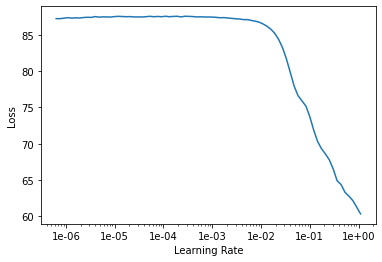

In [87]:
# Create deep learning model
learn = tabular_learner(data, layers=[200,100], metrics=[rmse,r2_score])

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr =1e-01)

In [88]:
#Fitting data and training the network
learn.fit_one_cycle(60, max_lr =1e-01)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,1.907988,1.510837,1.229161,-4.380747,00:00
1,1.731049,1.017288,1.008607,-2.623004,00:00
2,1.453906,0.468734,0.684642,-0.669367,00:00
3,1.177708,0.088646,0.297735,0.684293,00:00
4,0.942268,0.287077,0.535795,-0.022405,00:00
5,0.858613,1.225218,1.106896,-3.363533,00:00
6,0.973402,2.179525,1.476322,-6.762238,00:00
7,1.174116,1.875840,1.369613,-5.680683,00:00
8,1.224613,0.460305,0.678458,-0.639346,00:00
9,1.108526,0.232634,0.482322,0.171488,00:00


In [89]:
learn.show_results()

CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,target,prediction
#na#,gas,std,four,sedan,rwd,front,ohc,six,mpfi,-1.4443,-0.6842,0.8076,1.2229,0.4634,0.8038,1.3077,2.0444,1.0779,0.4283,-0.5439,1.9647,0.5312,-1.4413,-1.3055,10.33397,[10.181273]
#na#,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,-1.5450,-0.6842,0.1350,0.3413,0.9348,-0.6816,0.9644,0.1120,-0.7216,0.4600,-0.8040,1.4075,0.7375,-1.4413,-1.3055,9.790273,[9.667377]
#na#,gas,std,four,sedan,fwd,front,ohc,four,2bbl,-0.0174,-0.6842,-0.2518,-0.0506,-0.3378,0.4023,-0.4921,-0.1606,0.0129,0.6821,-0.4138,-0.1880,0.1187,0.2912,0.5104,9.164192,[9.12012]
saab 99e,gas,std,two,hatchback,fwd,front,ohc,four,mpfi,0.5198,1.7040,0.0677,1.0270,0.2749,0.9644,0.1983,-0.1358,0.7841,-0.5871,-0.2031,0.1413,0.2219,-0.6538,-0.3975,9.380083,[9.683247]
#na#,diesel,turbo,four,wagon,rwd,front,ohc,five,idi,-0.5546,-1.4803,1.9006,1.3780,2.0660,2.0082,2.3161,1.4003,0.9310,1.2215,2.9679,0.4705,-1.6344,-0.4963,-0.8515,10.248778,[10.098663]


In [90]:

#Getting The Training And Validation Errors

tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))

print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7f758af729e0>, <function r2_score at 0x7f758af72b90>]

The calculated RMSE & R-Squared For The Training Set : [tensor(0.0474), tensor(0.9899)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(0.1220), tensor(0.9470)]


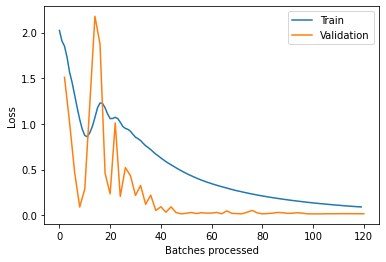

In [91]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()


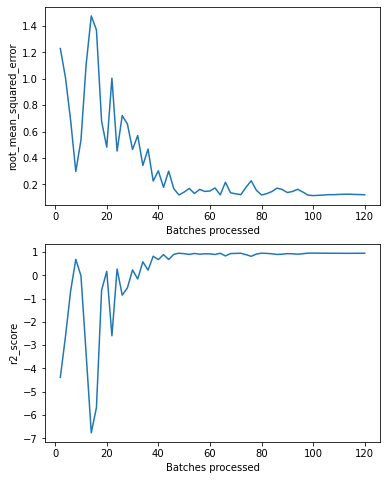

In [92]:

#Plotting the metrics of evaluation
learn.recorder.plot_metrics()